# Problema

Predecir el coste del seguro

# El set de datos

* age: age of primary beneficiary

* sex: insurance contractor gender, female, male

* bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

* children: Number of children covered by health insurance / Number of dependents

* smoker: Smoking

* region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

* charges: Individual medical costs billed by health insurance



In [19]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
# Carga el archivo desde los archivos del cuaderno
df = pd.read_csv('insurance.csv')

# Haz algo con el DataFrame, por ejemplo, muestra las primeras filas
print(df.head())


   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [20]:
print(df.shape)
df.head()

(1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Objetivo

Generar un model de regresión capaz de predecir el valor del seguro en base a las características del cliente.

* Aplicar las técnicas oportunas de procesamiento de datos

* Valorar diferentes modelos de regresión

* Comparación entre modelos

* Ensemble

* Métricas

* Conclusiones finales

## Implementación

## Empieza la limpieza del dataset

In [21]:
# Identificar valores faltantes en el dataset
missing_values = df.isnull().sum()

# Mostrar las columnas con valores faltantes y su cantidad
print("Valores faltantes por columna:")
print(missing_values)


Valores faltantes por columna:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [22]:
# Verificar columnas categóricas con un solo nivel
single_level_categorical = []
for column in df.columns:
    if df[column].nunique() == 1:
        single_level_categorical.append(column)

# Verificar columnas numéricas con un solo valor
single_value_numeric = []
for column in df.select_dtypes(include='number').columns:
    if df[column].nunique() == 1:
        single_value_numeric.append(column)

# Mostrar columnas irrelevantes encontradas
print("Columnas categóricas con un solo nivel:", single_level_categorical)
print("Columnas numéricas con un solo valor:", single_value_numeric)


Columnas categóricas con un solo nivel: []
Columnas numéricas con un solo valor: []


In [23]:
# Contar filas duplicadas
duplicates_count = df[df.duplicated()].shape[0]

# Mostrar el número de filas duplicadas
print("Número de filas duplicadas:", duplicates_count)


Número de filas duplicadas: 1


In [24]:
# Eliminar filas con valores faltantes
df_clean = df.dropna()

# Contar filas duplicadas antes de eliminarlas
duplicates_before = df_clean[df_clean.duplicated()].shape[0]

# Eliminar filas duplicadas
df_clean = df_clean.drop_duplicates()

# Contar filas duplicadas después de eliminarlas
duplicates_after = df_clean[df_clean.duplicated()].shape[0]

# Mostrar el número de filas duplicadas antes y después de la eliminación
print("Número de filas duplicadas antes de eliminarlas:", duplicates_before)
print("Número de filas duplicadas después de eliminarlas:", duplicates_after)

# Mostrar la cantidad de filas después de la limpieza completa
print("Número de filas después de la limpieza completa:", df_clean.shape[0])

Número de filas duplicadas antes de eliminarlas: 1
Número de filas duplicadas después de eliminarlas: 0
Número de filas después de la limpieza completa: 1337


In [25]:
# Seleccionar solo las columnas numéricas de interés
numeric_columns = ["age", "bmi", "children" ]
df_numeric = df_clean[numeric_columns]

# Verificar si hay valores negativos en las columnas numéricas
negative_values = df_numeric[df_numeric < 0].any()

# Mostrar si hay algún valor negativo en las variables numéricas seleccionadas
print("¿Hay algún valor negativo en las variables numéricas seleccionadas?")
print(negative_values)

¿Hay algún valor negativo en las variables numéricas seleccionadas?
age         False
bmi         False
children    False
dtype: bool


In [26]:
# Mostrar los 25 valores máximos de la columna "age"
max_age = df_clean['age'].nlargest(25)
print("Los 25 valores máximos de 'age' son:")
print(max_age)


Los 25 valores máximos de 'age' son:
62      64
94      64
199     64
328     64
335     64
378     64
398     64
402     64
418     64
420     64
534     64
603     64
635     64
664     64
752     64
768     64
801     64
825     64
890     64
1051    64
1241    64
1265    64
26      63
33      63
109     63
Name: age, dtype: int64


In [27]:
# Mostrar el valor máximo de la columna "day"
max_children = df_clean['children'].max()
print("El valor máximo de 'children' es:", max_children)

# Mostrar el valor mínimo de la columna "day"
min_children = df_clean['children'].min()
print("El valor mínimo de 'children' es:", min_children)


El valor máximo de 'children' es: 5
El valor mínimo de 'children' es: 0


In [28]:
# Mostrar el valor máximo de la columna "day"
max_children = df_clean['bmi'].max()
print("El valor máximo de 'bmi' es:", max_children)

# Mostrar el valor mínimo de la columna "day"
min_children = df_clean['bmi'].min()
print("El valor mínimo de 'bmi' es:", min_children)


El valor máximo de 'bmi' es: 53.13
El valor mínimo de 'bmi' es: 15.96


In [29]:
# Obtener las columnas categóricas del DataFrame
columnas_categoricas = df.select_dtypes(include=['object']).columns

# Iterar sobre las columnas categóricas para imprimir las categorías únicas
for columna in columnas_categoricas:
    print("Categorías únicas en la columna '{}':".format(columna))
    print(df[columna].unique())
    print()  # Agregar una línea en blanco para separar las categorías de cada columna


Categorías únicas en la columna 'sex':
['female' 'male']

Categorías únicas en la columna 'smoker':
['yes' 'no']

Categorías únicas en la columna 'region':
['southwest' 'southeast' 'northwest' 'northeast']



In [30]:
import pandas as pd

# Suponiendo que 'df' es tu DataFrame
# Si estás trabajando en Google Colab y tienes un archivo CSV, puedes cargarlo así:
# df = pd.read_csv("nombre_del_archivo.csv")

# Para verificar si hay valores nulos en el DataFrame
if df.isnull().values.any():
    print("Se encontraron valores nulos en el DataFrame.")
    # Si deseas ver la cantidad de valores nulos por columna, puedes usar:
    print(df.isnull().sum())
else:
    print("No se encontraron valores nulos en el DataFrame.")


No se encontraron valores nulos en el DataFrame.


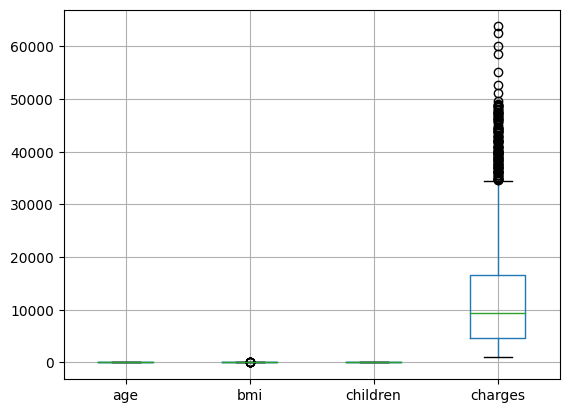

In [31]:
import matplotlib.pyplot as plt

# Boxplot
df.boxplot()
plt.show()


In [32]:
import pandas as pd

# Suponiendo que 'df' es tu DataFrame

# Iterar sobre cada columna del DataFrame
for column in df.columns:
    # Obtener los valores únicos de la columna actual
    unique_values = df[column].unique()

    # Imprimir el nombre de la columna y los valores únicos
    print(f"Valores únicos en la columna '{column}':")
    print(unique_values)
    print()


Valores únicos en la columna 'age':
[19 18 28 33 32 31 46 37 60 25 62 23 56 27 52 30 34 59 63 55 22 26 35 24
 41 38 36 21 48 40 58 53 43 64 20 61 44 57 29 45 54 49 47 51 42 50 39]

Valores únicos en la columna 'sex':
['female' 'male']

Valores únicos en la columna 'bmi':
[27.9   33.77  33.    22.705 28.88  25.74  33.44  27.74  29.83  25.84
 26.22  26.29  34.4   39.82  42.13  24.6   30.78  23.845 40.3   35.3
 36.005 32.4   34.1   31.92  28.025 27.72  23.085 32.775 17.385 36.3
 35.6   26.315 28.6   28.31  36.4   20.425 32.965 20.8   36.67  39.9
 26.6   36.63  21.78  30.8   37.05  37.3   38.665 34.77  24.53  35.2
 35.625 33.63  28.    34.43  28.69  36.955 31.825 31.68  22.88  37.335
 27.36  33.66  24.7   25.935 22.42  28.9   39.1   36.19  23.98  24.75
 28.5   28.1   32.01  27.4   34.01  29.59  35.53  39.805 26.885 38.285
 37.62  41.23  34.8   22.895 31.16  27.2   26.98  39.49  24.795 31.3
 38.28  19.95  19.3   31.6   25.46  30.115 29.92  27.5   28.4   30.875
 27.94  35.09  29.7   35.72  3

In [33]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Suponiendo que 'df' es tu DataFrame con las características que deseas escalar
# Selecciona las características numéricas que deseas escalar
numeric_features = ['age', 'bmi', 'children']

# Crea un StandardScaler
scaler = StandardScaler()

# Ajusta el scaler a tus datos y transforma las características
df[numeric_features] = scaler.fit_transform(df[numeric_features])

# Ahora df contiene las características escaladas
# Puedes usar df para entrenar tus modelos de Random Forest, Decision Trees, SVR, etc.


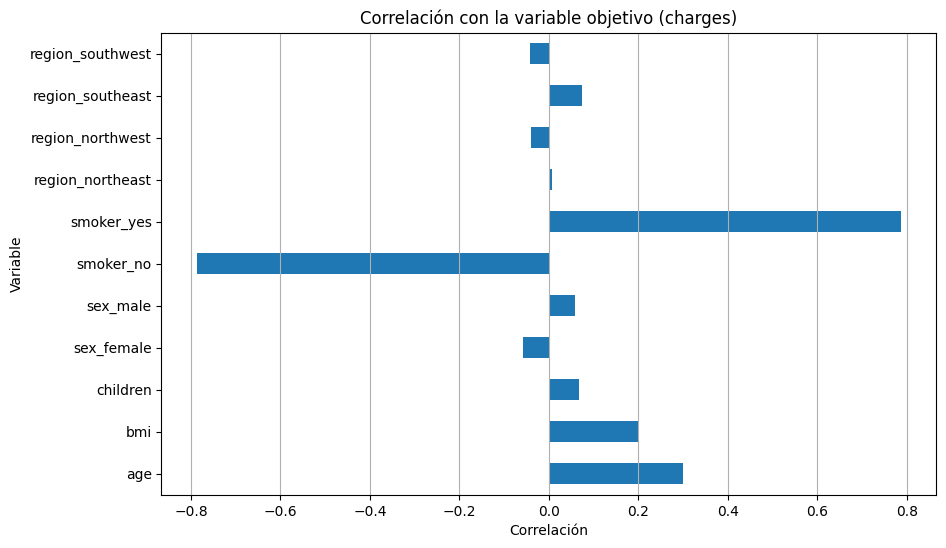

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Suponiendo que 'df' es tu DataFrame que contiene todas las variables, incluida 'charges'

# Codifica las variables categóricas utilizando one-hot encoding
df_encoded = pd.get_dummies(df)

# Calcula la matriz de correlación
correlation_matrix = df_encoded.corr()

# Encuentra la correlación de 'charges' con todas las variables
charges_correlation = correlation_matrix['charges'].drop('charges')

# Crea un gráfico de barras horizontales
plt.figure(figsize=(10, 6))
charges_correlation.plot(kind='barh')
plt.title('Correlación con la variable objetivo (charges)')
plt.xlabel('Correlación')
plt.ylabel('Variable')
plt.grid(axis='x')
plt.show()


In [35]:
import pandas as pd

# Suponiendo que 'df' es tu DataFrame que contiene todas las variables, incluidas 'charges' y 'smoker'

# Calcula las estadísticas descriptivas de 'charges' para fumadores y no fumadores
charges_stats = df.groupby('smoker')['charges'].describe()

print("Estadísticas descriptivas de los cargos médicos para fumadores:")
print(charges_stats.loc['yes'])
print("\nEstadísticas descriptivas de los cargos médicos para no fumadores:")
print(charges_stats.loc['no'])


Estadísticas descriptivas de los cargos médicos para fumadores:
count      274.000000
mean     32050.231832
std      11541.547176
min      12829.455100
25%      20826.244213
50%      34456.348450
75%      41019.207275
max      63770.428010
Name: yes, dtype: float64

Estadísticas descriptivas de los cargos médicos para no fumadores:
count     1064.000000
mean      8434.268298
std       5993.781819
min       1121.873900
25%       3986.438700
50%       7345.405300
75%      11362.887050
max      36910.608030
Name: no, dtype: float64


# Empezamos a probar modelos

## RANDOM FOREST
RMSE: 4588.16

In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Suponiendo que 'df' es tu DataFrame que contiene todas las variables, incluida 'charges'

# Convertir variables categóricas en variables numéricas usando one-hot encoding
df_encoded = pd.get_dummies(df)

# Dividir el conjunto de datos en características (X) y la variable objetivo (y)
X = df_encoded.drop('charges', axis=1)  # Características
y = df_encoded['charges']  # Variable objetivo

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar el modelo de Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Entrenar el modelo
rf_model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = rf_model.predict(X_test)

# Calcular métricas de evaluación
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Imprimir métricas de evaluación
print("Métricas de evaluación del modelo:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R^2 Score: {r2:.2f}")


Métricas de evaluación del modelo:
MAE: 2540.99
MSE: 21051201.60
RMSE: 4588.16
R^2 Score: 0.86


## SVR
RMSE: 11337.61

In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Suponiendo que 'df' es tu DataFrame que contiene todas las variables, incluida 'charges'

# Convertir variables categóricas en variables numéricas usando one-hot encoding
df_encoded = pd.get_dummies(df)

# Dividir el conjunto de datos en características (X) y la variable objetivo (y)
X = df_encoded.drop('charges', axis=1)  # Características
y = df_encoded['charges']  # Variable objetivo

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir los hiperparámetros a buscar
param_grid = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto']
}

# Inicializar el modelo SVR
svr_model = SVR()

# Inicializar la búsqueda de cuadrícula
grid_search = GridSearchCV(svr_model, param_grid, cv=5, scoring='r2')

# Entrenar la búsqueda de cuadrícula
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo
best_svr_model = grid_search.best_estimator_

# Predecir en el conjunto de prueba usando el mejor modelo
y_pred = best_svr_model.predict(X_test)

# Calcular métricas de evaluación
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Imprimir métricas de evaluación
print("Métricas de evaluación del mejor modelo SVR:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R^2 Score: {r2:.2f}")

# Mostrar los mejores hiperparámetros encontrados
print("\nMejores hiperparámetros encontrados:")
print(grid_search.best_params_)


Métricas de evaluación del mejor modelo SVR:
MAE: 5663.63
MSE: 128541503.37
RMSE: 11337.61
R^2 Score: 0.17

Mejores hiperparámetros encontrados:
{'C': 10, 'gamma': 'scale', 'kernel': 'linear'}


## KNN
RMSE: 6043.43

In [38]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Suponiendo que 'df' es tu DataFrame que contiene todas las variables, incluida 'charges'

# Convertir variables categóricas en variables numéricas usando one-hot encoding
df_encoded = pd.get_dummies(df)

# Dividir el conjunto de datos en características (X) y la variable objetivo (y)
X = df_encoded.drop('charges', axis=1)  # Características
y = df_encoded['charges']  # Variable objetivo

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar el modelo KNN
knn_model = KNeighborsRegressor(n_neighbors=5)  # Define el número de vecinos (K)

# Entrenar el modelo
knn_model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred_knn = knn_model.predict(X_test)

# Calcular métricas de evaluación
mae_knn = mean_absolute_error(y_test, y_pred_knn)
mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = mean_squared_error(y_test, y_pred_knn, squared=False)
r2_knn = r2_score(y_test, y_pred_knn)

# Imprimir métricas de evaluación
print("Métricas de evaluación del modelo KNN:")
print(f"MAE: {mae_knn:.2f}")
print(f"MSE: {mse_knn:.2f}")
print(f"RMSE: {rmse_knn:.2f}")
print(f"R^2 Score: {r2_knn:.2f}")


Métricas de evaluación del modelo KNN:
MAE: 3672.87
MSE: 36523096.59
RMSE: 6043.43
R^2 Score: 0.76


## XGBOOST
RMSE: 4738.61

In [39]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Suponiendo que 'df' es tu DataFrame que contiene todas las variables, incluida 'charges'

# Convertir variables categóricas en variables numéricas usando one-hot encoding
df_encoded = pd.get_dummies(df)

# Dividir el conjunto de datos en características (X) y la variable objetivo (y)
X = df_encoded.drop('charges', axis=1)  # Características
y = df_encoded['charges']  # Variable objetivo

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar el modelo XGBoost
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Entrenar el modelo
xgb_model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred_xgb = xgb_model.predict(X_test)

# Calcular métricas de evaluación
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = mean_squared_error(y_test, y_pred_xgb, squared=False)
r2_xgb = r2_score(y_test, y_pred_xgb)

# Imprimir métricas de evaluación
print("Métricas de evaluación del modelo XGBoost:")
print(f"MAE: {mae_xgb:.2f}")
print(f"MSE: {mse_xgb:.2f}")
print(f"RMSE: {rmse_xgb:.2f}")
print(f"R^2 Score: {r2_xgb:.2f}")


Métricas de evaluación del modelo XGBoost:
MAE: 2604.33
MSE: 22454421.07
RMSE: 4738.61
R^2 Score: 0.86


## GRADIENT BOOSTING
RMSE: 4335.73 segundo mejor


In [40]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Suponiendo que 'df' es tu DataFrame que contiene todas las variables, incluida 'charges'

# Convertir variables categóricas en variables numéricas usando one-hot encoding
df_encoded = pd.get_dummies(df)

# Dividir el conjunto de datos en características (X) y la variable objetivo (y)
X = df_encoded.drop('charges', axis=1)  # Características
y = df_encoded['charges']  # Variable objetivo

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar el modelo Gradient Boosting
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Entrenar el modelo
gb_model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred_gb = gb_model.predict(X_test)

# Calcular métricas de evaluación
mae_gb = mean_absolute_error(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)
rmse_gb = mean_squared_error(y_test, y_pred_gb, squared=False)
r2_gb = r2_score(y_test, y_pred_gb)

# Imprimir métricas de evaluación
print("Métricas de evaluación del modelo Gradient Boosting:")
print(f"MAE: {mae_gb:.2f}")
print(f"MSE: {mse_gb:.2f}")
print(f"RMSE: {rmse_gb:.2f}")
print(f"R^2 Score: {r2_gb:.2f}")


Métricas de evaluación del modelo Gradient Boosting:
MAE: 2405.96
MSE: 18798533.40
RMSE: 4335.73
R^2 Score: 0.88


RMSE: 4417.43

In [41]:
from sklearn.ensemble import VotingRegressor
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Inicializar los modelos individuales
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)

# Crear un ensamblado por promedio de los modelos
ensemble_model = VotingRegressor([('gb', gb_model), ('xgb', xgb_model)], weights=[1, 1])

# Entrenar el ensamblado de modelos
ensemble_model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred_ensemble = ensemble_model.predict(X_test)

# Calcular métricas de evaluación
rmse_ensemble = mean_squared_error(y_test, y_pred_ensemble, squared=False)

# Imprimir métrica de evaluación
print(f"RMSE del ensamblado por promedio: {rmse_ensemble:.2f}")


RMSE del ensamblado por promedio: 4417.43


# Optimizar los hiperparámetros del modelo Gradient Boosting
## RMSE: 4320.15 (mínimo)

In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Definir los hiperparámetros a explorar
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# Inicializar el modelo Gradient Boosting
gb_model = GradientBoostingRegressor(random_state=42)

# Inicializar la búsqueda de cuadrícula
grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Ejecutar la búsqueda de cuadrícula en los datos
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo y sus hiperparámetros
best_gb_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Predecir en el conjunto de prueba utilizando el mejor modelo
y_pred_best = best_gb_model.predict(X_test)

# Calcular las métricas de evaluación
rmse_best = mean_squared_error(y_test, y_pred_best, squared=False)
mae_best = mean_absolute_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

# Imprimir el mejor modelo y su rendimiento
print("Mejor modelo Gradient Boosting encontrado:")
print(best_gb_model)
print("\nMejores hiperparámetros encontrados:")
print(best_params)
print(f"\nRMSE del mejor modelo: {rmse_best:.2f}")
print(f"MAE del mejor modelo: {mae_best:.2f}")
print(f"R^2 Score del mejor modelo: {r2_best:.2f}")


Mejor modelo Gradient Boosting encontrado:
GradientBoostingRegressor(n_estimators=50, random_state=42)

Mejores hiperparámetros encontrados:
{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}

RMSE del mejor modelo: 4320.15
MAE del mejor modelo: 2457.79
R^2 Score del mejor modelo: 0.88


# Remuestreo (bootstrap) en el modelo Gradient Boosting
### RMSE: 4320.15 (mínimo)

In [43]:

from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Inicializar el modelo Gradient Boosting
gb_model = GradientBoostingRegressor(random_state=42)

# Definir los hiperparámetros a explorar
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# Inicializar la validación cruzada con remuestreo (bootstrap)
bootstrap_cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

# Inicializar la búsqueda de cuadrícula
grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=bootstrap_cv, scoring='neg_mean_squared_error', n_jobs=-1)

# Ejecutar la búsqueda de cuadrícula en los datos
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo y sus hiperparámetros
best_gb_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Predecir en el conjunto de prueba utilizando el mejor modelo
y_pred_best = best_gb_model.predict(X_test)

# Calcular el RMSE del mejor modelo
rmse_best = mean_squared_error(y_test, y_pred_best, squared=False)

# Imprimir el mejor modelo y su rendimiento
print("Mejor modelo Gradient Boosting encontrado:")
print(best_gb_model)
print("\nMejores hiperparámetros encontrados:")
print(best_params)
print(f"\nRMSE del mejor modelo: {rmse_best:.2f}")


Mejor modelo Gradient Boosting encontrado:
GradientBoostingRegressor(n_estimators=50, random_state=42)

Mejores hiperparámetros encontrados:
{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}

RMSE del mejor modelo: 4320.15


# Conclusiones

### En este ejercicio, el modelo que mejor resultado nos da es el Gradient Boosting usando grid search, con **RMSE: 4320.15** y **R^2 Score del mejor modelo: 0.88**